In [1]:
import cv2
import matplotlib.pyplot as plt
import json


In [2]:
def open_video_and_check(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video at {video_path}")
    return cap


In [3]:
def get_video_metadata(cap):
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = cap.get(cv2.CAP_PROP_FPS)
    return frame_count, height, width, fps


In [4]:
def display_cv2_img(img, figsize=(10, 10)):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_rgb)
    ax.axis("off")
    plt.show()


In [5]:
def display_grid_of_frames(video_path, grid_every_n_frames=10, grid_max_frames=100):
    cap = open_video_and_check(video_path)
    frame_count, _, _, _ = get_video_metadata(cap)

    frame_info = []  # List to store frame information

    fig, axs = plt.subplots(10, 10, figsize=(30, 20))
    axs = axs.flatten()
    img_idx = 0
    print("Displaying every 10th frame in a 10x10 grid:")
    
    for frame in range(frame_count):
        ret, img = cap.read()
        if not ret:
            break
        if frame % grid_every_n_frames == 0 and img_idx < grid_max_frames:
            axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[img_idx].set_title(f'Frame: {frame}')
            axs[img_idx].axis('off')
            img_idx += 1
            frame_info.append({"frame": frame, "displayed": True})  # Store frame info

    plt.tight_layout()
    plt.show()
    cap.release()
    return frame_info


In [6]:
def jump_to_and_display_frame(video_path, jump_to_frame=900):
    cap = open_video_and_check(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, jump_to_frame)
    ret, img = cap.read()
    if ret:
        print(f"Displaying frame {jump_to_frame}")
        display_cv2_img(img)
        jumped_frame_info = {"frame": jump_to_frame, "displayed": True}  # Store jumped frame info
    else:
        print(f"Could not read frame {jump_to_frame}")
        jumped_frame_info = {"frame": jump_to_frame, "displayed": False}  # Store failed frame info
    cap.release()
    return jumped_frame_info


In [7]:
def process_video(video_path, grid_every_n_frames=10, grid_max_frames=100, jump_to_frame=900, output_json="output.json"):
    # Open video and check, then get metadata
    cap = open_video_and_check(video_path)
    frame_count, height, width, fps = get_video_metadata(cap)
    cap.release()

    # Create the output dictionary
    output_data = {
        "video_metadata": {
            "frame_count": frame_count,
            "height": height,
            "width": width,
            "fps": fps
        },
        "frame_info": display_grid_of_frames(video_path, grid_every_n_frames, grid_max_frames),
        "jumped_frame_info": jump_to_and_display_frame(video_path, jump_to_frame)
    }

    # Save the output data to a JSON file
    with open(output_json, "w") as json_file:
        json.dump(output_data, json_file, indent=4)

    print(f"Output saved to {output_json}")


Displaying every 10th frame in a 10x10 grid:


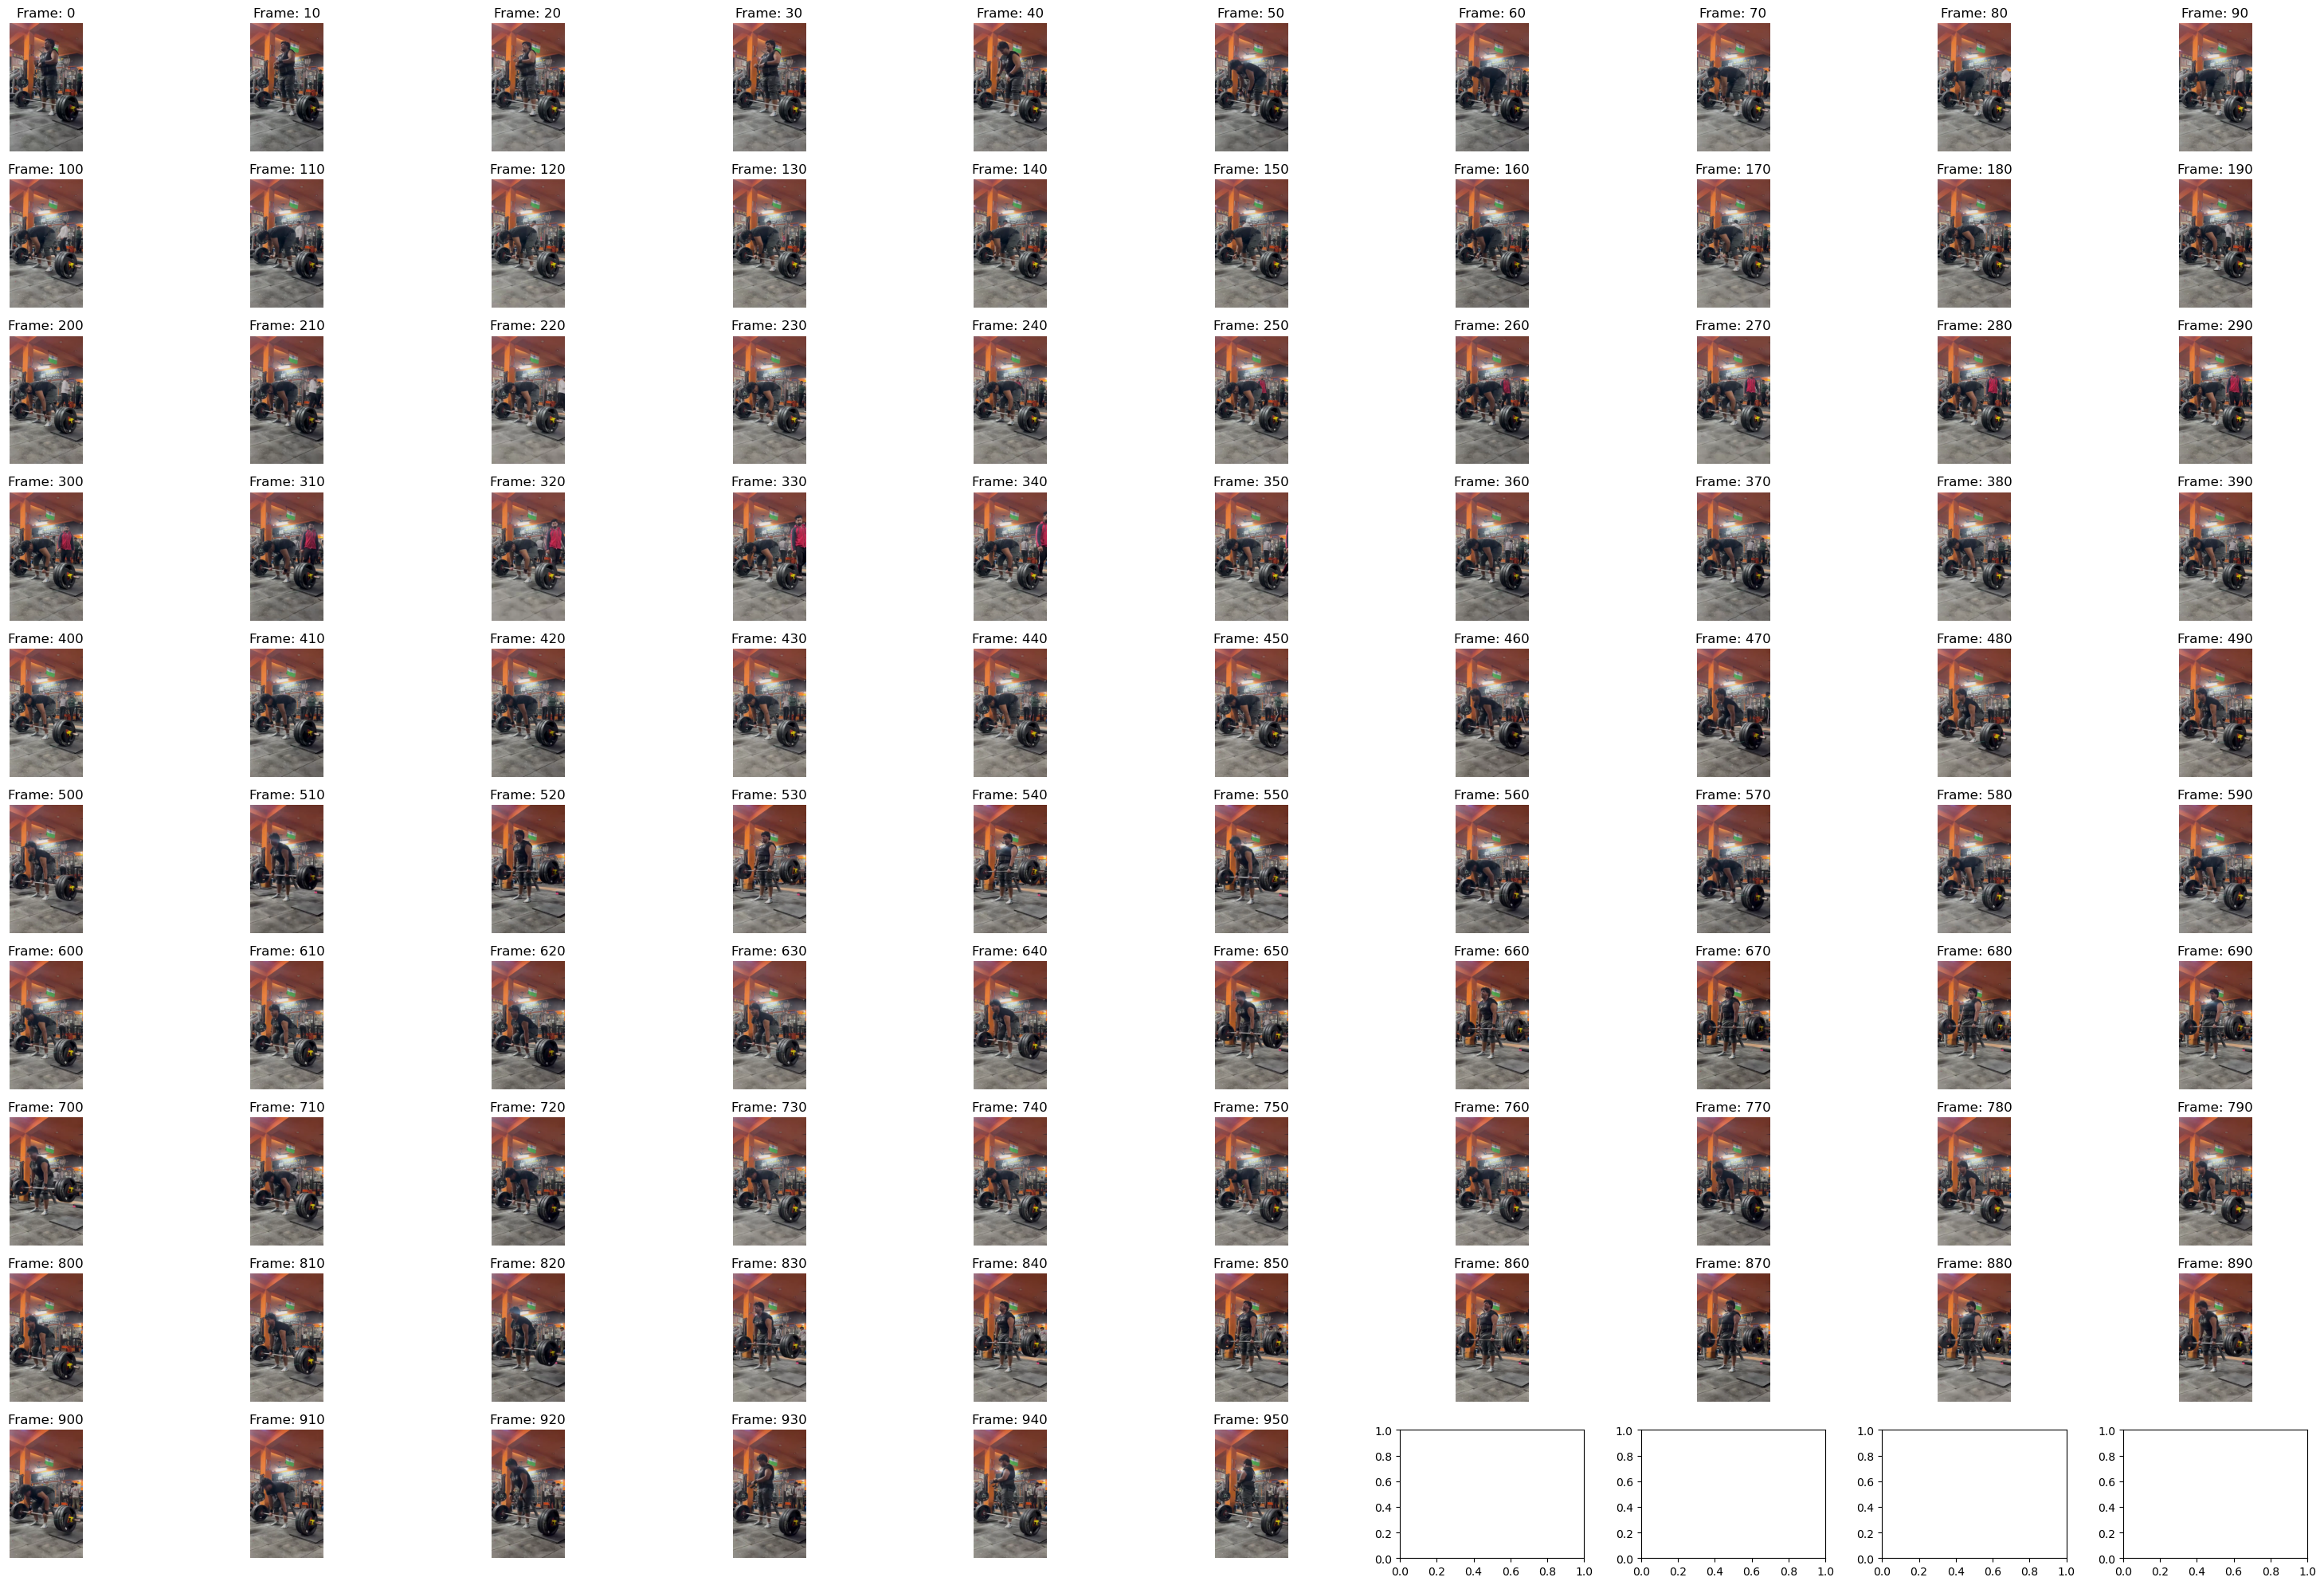

Displaying frame 900


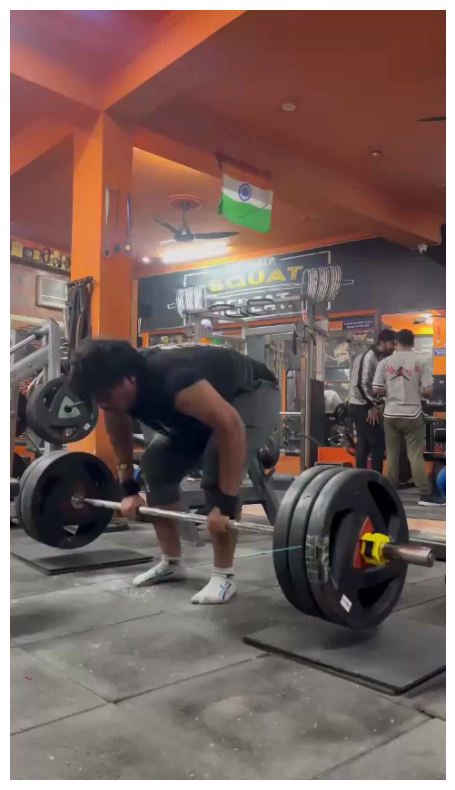

Output saved to output_video_data.json


In [8]:
process_video("/Users/puravgupta/Desktop/private/WhatsApp Video 2024-02-28 at 09.44.13.mp4", output_json="output_video_data.json")
